#Task 1: Advanced Objective Function and Use Case

## 1.

### Likelihood Function in Logistic Regression

The probability of the outcome $y_n$ given the input $x_n$ and model parameters $Θ$ is modeled as: $P(y_n|x_n, Θ) = σ(Θ^Tx_n)^{y_n}(1 - σ(Θ^Tx_n))^{1-y_n}$ where $σ(Θ^Tx_n)^{y_n} = \frac{1}{1 + e^{-(Θ^Tx_n)^{y_n}}}$

### Log-Likelihood Function

Given the data is IID, the likelihood for all N datapoints is: $P(D|Θ) = ∏^N_{n-1}P(y_n|x_n, Θ)$

Take the log for simplification: $logP(D|Θ) = ∑^N_{n=1}[y_nlogσ(Θ^Tx_n) + (1-y_n)log(1 - σ(Θ^Tx_n))]$

### Negative Log-Likelhiood (NLL)

Minimize the NLL to get the objective function for logistic regression: $NLL(Θ) = -∑^N_{n=1}[y_nlogσ(Θ^Tx_n) + (1-y_n)log(1 - σ(Θ^Tx_n))]$

$\therefore Θ̂_{MLE} = min(NLL)$

### MAP vs MLE:

MAP differs from MLE in that it maximizes the posterior distribution, which is the likelihood of the data given the parameters combined with the prior belief about the parametres: https://www.cs.cornell.edu/courses/cs4780/2015fa/web/lecturenotes/lecturenote06.html

## 2.

Credit default prediction is a binary classification problem I wish to solve using logistic regression. Logistic Regression is the best choice since it can handle feature correlation, provide interpretable results, and model complex relationships between features as compared to Naive Bayes which can struggle with correlated features.

https://www.geeksforgeeks.org/naive-bayes-vs-logistic-regression-in-machine-learning/

## 3.

$y_n$: 0 for "no default", 1 for "default"

$x_n$: income, credit score, debt

$Θ$: weights corresponding to each feature learned through model training

$σ(Θ^Tx_n)$: linear combination of features and weights mapped between 0 and 1 for the predicted probability of the nth datapoint.

Assumptions: linearity of log-odds + data is IID


#Task 2: Dataset and Advanced EDA

##1. https://www.kaggle.com/datasets/blastchar/telco-customer-churn


In [1]:
# 2.2

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/CSCI_6967/HW1/data.csv'
data = pd.read_csv(file_path)

data.drop(columns=['customerID'], inplace=True)

# Label encoding for binary categorical columns
# Creating one-hot encodings to account for features like 'No internet service' and 'No phone service' resulted in multicollinearity and inf values in the VIF calculation, so they were reduced to 'No'
data['gender'] = data['gender'].map({'Female': 0, 'Male': 1})
data['Partner'] = data['Partner'].map({'No': 0, 'Yes': 1})
data['Dependents'] = data['Dependents'].map({'No': 0, 'Yes': 1})
data['PhoneService'] = data['PhoneService'].map({'No': 0, 'Yes': 1})
data['MultipleLines'] = data['MultipleLines'].map({'No phone service': 0, 'No': 0, 'Yes': 1})
data['OnlineSecurity'] = data['OnlineSecurity'].map({'No internet service': 0, 'No': 0, 'Yes': 1})
data['OnlineBackup'] = data['OnlineBackup'].map({'No internet service': 0, 'No': 0, 'Yes': 1})
data['DeviceProtection'] = data['DeviceProtection'].map({'No internet service': 0, 'No': 0, 'Yes': 1})
data['TechSupport'] = data['TechSupport'].map({'No internet service': 0, 'No': 0, 'Yes': 1})
data['StreamingTV'] = data['StreamingTV'].map({'No internet service': 0, 'No': 0, 'Yes': 1})
data['StreamingMovies'] = data['StreamingMovies'].map({'No internet service': 0, 'No': 0, 'Yes': 1})
data['PaperlessBilling'] = data['PaperlessBilling'].map({'No': 0, 'Yes': 1})
data['Churn'] = data['Churn'].map({'No': 0, 'Yes': 1})

# One-hot encode non-binary categorical columns InternetService, Contract, and PaymentMethod
data = pd.get_dummies(data, columns=['Contract', 'PaymentMethod', 'InternetService'], drop_first=True)

# Convert all bool columns to int64 (0 for False, 1 for True)
bool_columns = data.select_dtypes(include=['bool']).columns  # Identify the boolean columns

# Convert to int64
data[bool_columns] = data[bool_columns].astype('int64')

# Convert 'TotalCharges' to numeric (was object type)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Handle any NaN values created during conversion (11 NaN values)
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


# Check the first few rows after encoding
print(data.head())
print(data.dtypes)
print(data.isnull().sum())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              0               1             0                 1  ...   
2              0               1             1                 0  ...   
3              0               1             0                 1  ...   
4              0               0             0                 0  ...   

   MonthlyCharges  TotalCharges  Churn  Contract_One year  Contract_Two year  \
0           29.85         29.85      0                

<ipython-input-2-6d5d34102976>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Drop correlated columns with VIF scores > 10
data.drop(columns=['PhoneService', 'StreamingTV', 'MonthlyCharges', 'InternetService_Fiber optic'], inplace=True)

# Separate features (X) and target (y)
X = data.drop(columns=['Churn'])  # 'Churn' is the target variable
y = data['Churn']

# Add constant for VIF calculation
X_const = add_constant(X)

# Check correlation matrix to identify highly correlated features
correlation_matrix = X_const.corr()
print(correlation_matrix)

# Check the remaining columns
print(data.columns)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Display the VIF values
print(vif_data)


                                       const    gender  SeniorCitizen  \
const                                    NaN       NaN            NaN   
gender                                   NaN  1.000000      -0.001874   
SeniorCitizen                            NaN -0.001874       1.000000   
Partner                                  NaN -0.001808       0.016479   
Dependents                               NaN  0.010517      -0.211185   
tenure                                   NaN  0.005106       0.016567   
MultipleLines                            NaN -0.008414       0.142948   
OnlineSecurity                           NaN -0.017021      -0.038653   
OnlineBackup                             NaN -0.013773       0.066572   
DeviceProtection                         NaN -0.002105       0.059428   
TechSupport                              NaN -0.009212      -0.060625   
StreamingMovies                          NaN -0.010487       0.120176   
PaperlessBilling                         NaN -0.011

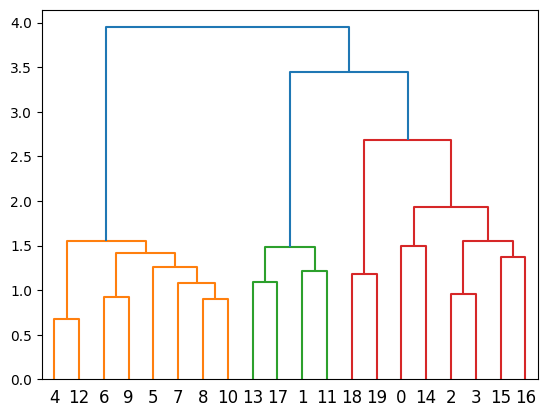

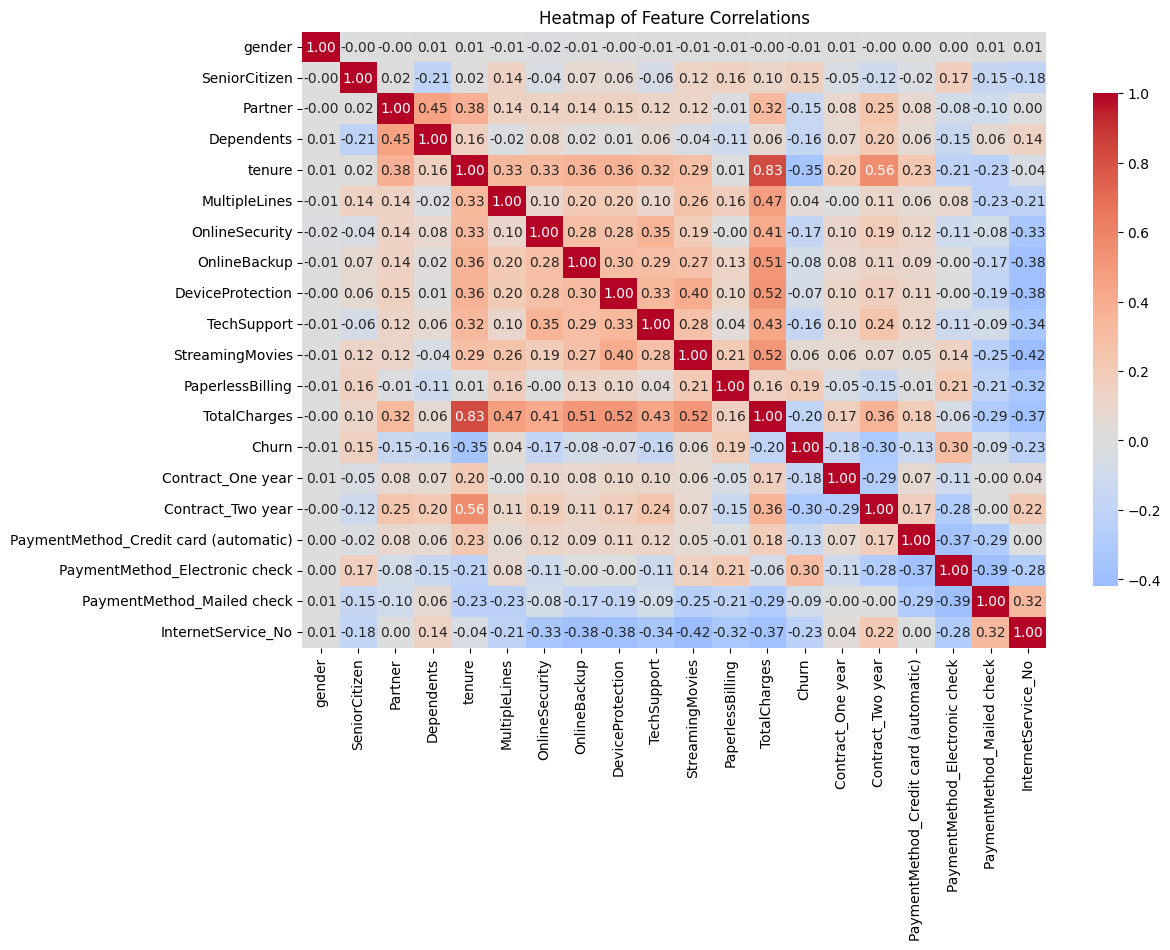

In [4]:
# 2.3

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as sch

# Compute the correlation matrix
correlation_matrix = data.corr()

# Create a clustering dendrogram
dendrogram = sch.dendrogram(sch.linkage(correlation_matrix, method='ward'))

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0, cbar_kws={'shrink': 0.8})
plt.title('Heatmap of Feature Correlations')
plt.show()


# Task 3:

In [5]:
# 3.1

import numpy as np

def sigmoid(z):
    """Vectorized sigmoid function."""
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, w):
    """
    Computes the binary cross-entropy (negative log-likelihood) cost for logistic regression.

    X: Feature matrix of shape (n_samples, n_features).
    y: Target labels of shape (n_samples, ).
    w: Parameter vector of shape (n_features, ).

    Returns: cost (float)
    """
    # Number of samples
    m = len(y)
    # Model predictions: h = sigmoid(Xw)
    h = sigmoid(X @ w)

    # Cross-entropy (log loss):
    # cost = - (1/m) * sum( y*log(h) + (1-y)*log(1-h) )
    cost = -np.mean(y * np.log(h + 1e-15) + (1 - y) * np.log(1 - h + 1e-15))
    return cost

def compute_gradient(X, y, w):
    """
    Computes the gradient of the cross-entropy cost w.r.t. the parameters w.

    Returns: gradient vector of shape (n_features, ).
    """
    m = len(y)
    h = sigmoid(X @ w)

    # Gradient = (1/m) * X^T * (h - y)
    grad = (1 / m) * X.T @ (h - y)
    return grad


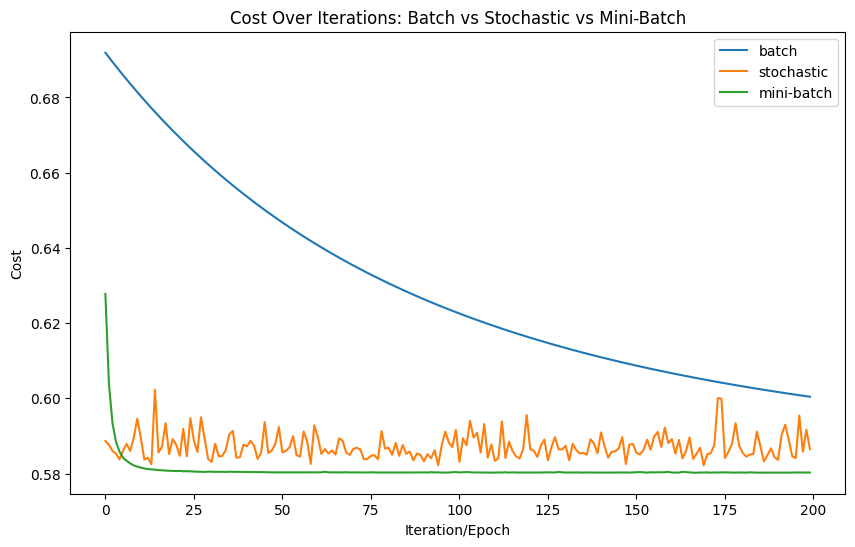


=== BATCH ===
Final Cost: 0.6004
Test Accuracy: 0.6877

=== STOCHASTIC ===
Final Cost: 0.5865
Test Accuracy: 0.6856

=== MINI-BATCH ===
Final Cost: 0.5802
Test Accuracy: 0.6934


In [14]:
# ==========================
# 3.1: Supporting Functions
# ==========================

import numpy as np

def sigmoid(z):
    """
    Vectorized sigmoid function:
    Converts z (which can be a scalar or vector) into the range (0, 1),
    used to map linear combinations of features to probabilities.
    """
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, w):
    """
    Computes the binary cross-entropy (negative log-likelihood) cost
    for logistic regression.

    Parameters
    ----------
    X : ndarray of shape (n_samples, n_features)
        Feature matrix.
    y : ndarray of shape (n_samples,)
        True binary labels (0 or 1).
    w : ndarray of shape (n_features,)
        Current parameter vector (weights).

    Returns
    -------
    cost : float
        The average log-loss across all samples.

    Notes
    -----
    cost = - (1/m) * sum( y*log(h) + (1-y)*log(1-h) ), where h = sigmoid(X@w).
    Add a small constant (1e-15) inside the log to avoid log(0).
    """
    m = len(y)            # number of samples
    h = sigmoid(X @ w)    # predicted probabilities for all samples
    # Cross-entropy (log loss) computation
    cost = -np.mean(
        y * np.log(h + 1e-15) +
        (1 - y) * np.log(1 - h + 1e-15)
    )
    return cost

def compute_gradient(X, y, w):
    """
    Computes the gradient of the cross-entropy cost w.r.t. parameters w.

    Parameters
    ----------
    X : ndarray of shape (n_samples, n_features)
    y : ndarray of shape (n_samples,)
    w : ndarray of shape (n_features,)

    Returns
    -------
    grad : ndarray of shape (n_features,)
        The partial derivatives of the cost function with respect to w.

    Notes
    -----
    grad = (1/m) * X^T * (h - y), where h = sigmoid(X@w).
    """
    m = len(y)
    h = sigmoid(X @ w)
    grad = (1 / m) * X.T @ (h - y)
    return grad


# ==========================
# 3.2: LogisticRegressionScratch Class
# ==========================

class LogisticRegressionScratch:
    def __init__(self,
                 learning_rate=0.01,
                 num_iterations=1000,
                 gradient_descent_type='batch',
                 batch_size=32,
                 verbose=False):
        """
        A from-scratch logistic regression implementing
        three variants of gradient descent: batch, stochastic, or mini-batch.

        Parameters
        ----------
        learning_rate : float
            Step size for gradient updates.
        num_iterations : int
            Number of epochs (outer loops) to run.
        gradient_descent_type : str
            Must be one of {'batch', 'stochastic', 'mini-batch'}.
        batch_size : int
            Only used if gradient_descent_type='mini-batch'.
        verbose : bool
            If True, periodically print cost info during training.

        Attributes
        ----------
        w : ndarray of shape (n_features,)
            Learned weight vector after calling fit().
        cost_history_ : list of floats
            Stores the cost at each iteration/epoch for plotting or analysis.
        """
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.gradient_descent_type = gradient_descent_type
        self.batch_size = batch_size
        self.verbose = verbose

        self.w = None          # Will hold learned parameters after fit()
        self.cost_history_ = []  # Track cost over all epochs

    def fit(self, X, y):
        """
        Fit the logistic regression model on training data (X, y).

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            Training feature matrix.
        y : ndarray of shape (n_samples,)
            Training labels (0 or 1).

        Returns
        -------
        self : object
            Fitted instance of LogisticRegressionScratch.

        Notes
        -----
        Depending on gradient_descent_type, calls the appropriate
        private method (_fit_batch_gd, _fit_sgd, or _fit_mini_batch_gd).
        """
        n_samples, n_features = X.shape

        # Initialize weights to zeros.
        self.w = np.zeros(n_features)

        if self.gradient_descent_type == 'batch':
            self._fit_batch_gd(X, y)
        elif self.gradient_descent_type == 'stochastic':
            self._fit_sgd(X, y)
        elif self.gradient_descent_type == 'mini-batch':
            self._fit_mini_batch_gd(X, y)
        else:
            raise ValueError(
                "Unknown gradient_descent_type. Choose from 'batch', 'stochastic', 'mini-batch'"
            )

        return self

    def _fit_batch_gd(self, X, y):
        """
        Batch Gradient Descent:
        Uses the entire training set to compute a single gradient update per iteration.

        - For each of num_iterations epochs:
            1) compute gradient over all samples
            2) update parameters
            3) track cost
        """
        for i in range(self.num_iterations):
            grad = compute_gradient(X, y, self.w)
            self.w -= self.learning_rate * grad

            # Track the cost to see how training progresses
            cost_val = compute_cost(X, y, self.w)
            self.cost_history_.append(cost_val)

            if self.verbose and i % 100 == 0:
                print(f"Iteration {i}, Cost: {cost_val:.4f}")

    def _fit_sgd(self, X, y):
        """
        Stochastic Gradient Descent (SGD):
        Updates parameters using one training example at a time.

        - For each of num_iterations epochs:
            1) Shuffle the data indices
            2) For each training sample:
               a) compute gradient using that single sample
               b) update parameters immediately
            3) track the cost once at the end of the epoch
        """
        n_samples = X.shape[0]
        for i in range(self.num_iterations):
            # Shuffle the training set indices each epoch
            indices = np.arange(n_samples)
            np.random.shuffle(indices)

            for idx in indices:
                # Extract a single example
                x_i = X[idx:idx+1, :]
                y_i = y[idx:idx+1]
                grad = compute_gradient(x_i, y_i, self.w)
                self.w -= self.learning_rate * grad

            # Track cost once per epoch (using the entire dataset)
            cost_val = compute_cost(X, y, self.w)
            self.cost_history_.append(cost_val)

            if self.verbose and i % 10 == 0:
                print(f"Epoch {i}, Cost: {cost_val:.4f}")

    def _fit_mini_batch_gd(self, X, y):
        """
        Mini-batch Gradient Descent:
        Updates parameters on small subsets ("batches") of the data each epoch.

        - For each of num_iterations epochs:
            1) Shuffle the data
            2) Partition it into batches of size `self.batch_size`
            3) For each batch:
               a) compute gradient on that mini-batch
               b) update parameters
            4) track cost once at the end of the epoch
        """
        n_samples = X.shape[0]
        for i in range(self.num_iterations):
            # Shuffle indices for mini-batch creation
            indices = np.arange(n_samples)
            np.random.shuffle(indices)

            # Iterate through mini-batches
            for start_idx in range(0, n_samples, self.batch_size):
                end_idx = start_idx + self.batch_size
                batch_indices = indices[start_idx:end_idx]
                X_batch = X[batch_indices]
                y_batch = y[batch_indices]

                grad = compute_gradient(X_batch, y_batch, self.w)
                self.w -= self.learning_rate * grad

            # Track cost at the end of each epoch
            cost_val = compute_cost(X, y, self.w)
            self.cost_history_.append(cost_val)

            if self.verbose and i % 10 == 0:
                print(f"Epoch {i}, Cost: {cost_val:.4f}")

    def predict_proba(self, X):
        """
        Compute predicted probabilities (0 to 1) using the learned weights.

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)

        Returns
        -------
        probs : ndarray of shape (n_samples,)
            Probability of each sample being in the positive (class=1) class.
        """
        return sigmoid(X @ self.w)

    def predict(self, X, threshold=0.5):
        """
        Predict class labels (0 or 1) by thresholding the probabilities.

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
        threshold : float
            Probability threshold for predicting class=1.

        Returns
        -------
        preds : ndarray of shape (n_samples,)
            Binary predictions (0 or 1).
        """
        return (self.predict_proba(X) >= threshold).astype(int)


# ====================================
# Example Usage on a Churn Dataset
# ====================================
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X = data.drop(columns=['Churn']).values  # shape (n_samples, n_features)
y = data['Churn'].values                 # shape (n_samples,)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Scale features to help with stable / faster convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Compare three variants of gradient descent:
gd_variants = ['batch', 'stochastic', 'mini-batch']
results = {}

plt.figure(figsize=(10,6))

for gd_type in gd_variants:
    # Instantiate logistic regression with chosen hyperparameters
    model = LogisticRegressionScratch(
        learning_rate=0.01,       # can be tuned
        num_iterations=200,       # number of epochs
        gradient_descent_type=gd_type,
        batch_size=64,            # only relevant if 'mini-batch'
        verbose=False
    )

    # Fit on the scaled training data
    model.fit(X_train_scaled, y_train)

    # Evaluate on the scaled test data
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    final_cost = model.cost_history_[-1] if model.cost_history_ else None

    # Store results for analysis
    results[gd_type] = {
        'accuracy': accuracy,
        'final_cost': final_cost,
        'cost_history': model.cost_history_
    }

    # Plot the cost history to see how each converges
    plt.plot(model.cost_history_, label=gd_type)

plt.title("Cost Over Iterations: Batch vs Stochastic vs Mini-Batch")
plt.xlabel("Iteration/Epoch")
plt.ylabel("Cost")
plt.legend()
plt.show()

# Print a simple summary table
for gd_type in gd_variants:
    print(f"\n=== {gd_type.upper()} ===")
    print(f"Final Cost: {results[gd_type]['final_cost']:.4f}")
    print(f"Test Accuracy: {results[gd_type]['accuracy']:.4f}")


# Task 4:


Training with SGD
Accuracy  = 0.6877
Precision = 0.4530
Recall    = 0.8503
F1-Score  = 0.5911

Training with MOMENTUM
Accuracy  = 0.6906
Precision = 0.4557
Recall    = 0.8529
F1-Score  = 0.5940

Training with RMSPROP
Accuracy  = 0.6899
Precision = 0.4553
Recall    = 0.8583
F1-Score  = 0.5950

Training with ADAM
Accuracy  = 0.6899
Precision = 0.4549
Recall    = 0.8503
F1-Score  = 0.5927


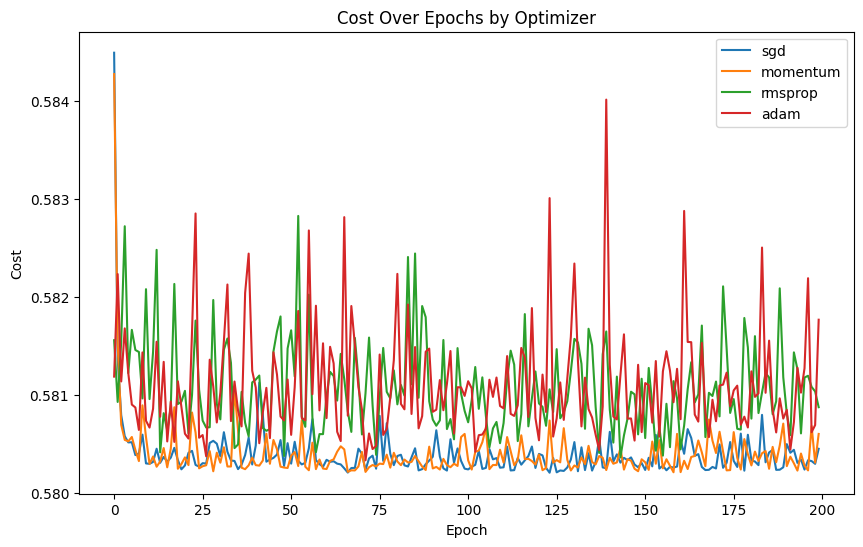

   learning_rate  beta_m  accuracy  precision    recall        f1
5          0.001    0.95  0.693400   0.458453  0.855615  0.597015
3          0.001    0.80  0.692690   0.457797  0.855615  0.596459
4          0.001    0.90  0.690561   0.455587  0.850267  0.593284
2          0.010    0.95  0.684173   0.450488  0.863636  0.592117
1          0.010    0.90  0.685593   0.450502  0.839572  0.586368
0          0.010    0.80  0.669269   0.437500  0.860963  0.580180

Best F1: 0.5988805970149254
Best (learning_rate, beta_m): (0.001, 0.95)


In [15]:
# =========================================
# 4.1: Advanced Optimizers for Logistic Regression
# =========================================

import numpy as np

def sigmoid(z):
    """
    Sigmoid activation function, mapping real z to (0,1).

    Parameters
    ----------
    z : float or ndarray
        Input value(s).

    Returns
    -------
    ndarray
        Element-wise sigmoid of z.
    """
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, w):
    """
    Computes the binary cross-entropy (log loss) for logistic regression.

    Parameters
    ----------
    X : ndarray of shape (n_samples, n_features)
        Feature matrix.
    y : ndarray of shape (n_samples,)
        True labels (0 or 1).
    w : ndarray of shape (n_features,)
        Current weights.

    Returns
    -------
    cost : float
        Average log loss across all samples.

    Notes
    -----
    cost = -mean[ y*log(h) + (1 - y)*log(1 - h) ],
    where h = sigmoid(X @ w).
    Add a small term (1e-15) inside log() to avoid log(0).
    """
    m = len(y)
    h = sigmoid(X @ w)
    # Negative log-likelihood (cross-entropy)
    cost = -np.mean(
        y * np.log(h + 1e-15) +
        (1 - y) * np.log(1 - h + 1e-15)
    )
    return cost

def compute_gradient(X, y, w):
    """
    Computes the gradient of the cross-entropy cost w.r.t. parameter w.

    Parameters
    ----------
    X : ndarray of shape (n_samples, n_features)
    y : ndarray of shape (n_samples,)
    w : ndarray of shape (n_features,)

    Returns
    -------
    grad : ndarray of shape (n_features,)
        The gradient vector for logistic regression.

    Notes
    -----
    grad = (1/m) * X^T * (sigmoid(X @ w) - y).
    """
    m = len(y)
    h = sigmoid(X @ w)
    grad = (1/m) * (X.T @ (h - y))
    return grad


class LogisticRegressionScratch:
    """
    A from-scratch logistic regression that can use one of four optimizers:
    'sgd', 'momentum', 'rmsprop', or 'adam'.

    Attributes
    ----------
    learning_rate : float
        Step size for gradient updates.
    num_iterations : int
        Number of epochs.
    optimizer : str
        One of {'sgd','momentum','rmsprop','adam'}.
    batch_size : int
        Size of mini-batch (if not using pure 'sgd').
    beta_m : float
        Momentum decay factor (used in Momentum or Adam).
    beta_r : float
        RMSProp decay factor (used in RMSProp or Adam).
    epsilon : float
        Tiny constant to prevent division by zero in RMSProp/Adam.
    verbose : bool
        If True, prints cost info every 10 epochs or so.
    w : ndarray
        Learned parameter vector after fit().
    cost_history_ : list
        Tracks cost each epoch for plotting / analysis.
    momentum_buffer_ : ndarray
        Stores momentum (velocity) term for Momentum / Adam.
    rmsprop_buffer_ : ndarray
        Stores running average of squared gradients for RMSProp / Adam.
    """

    def __init__(
        self,
        learning_rate=0.01,
        num_iterations=100,
        optimizer='sgd',        # 'sgd', 'momentum', 'rmsprop', or 'adam'
        batch_size=1,           # relevant for mini-batch or sgd
        beta_m=0.9,             # momentum hyperparam (used by Momentum, Adam)
        beta_r=0.999,           # RMSProp hyperparam (used by RMSProp, Adam)
        epsilon=1e-8,           # small constant in RMSProp/Adam
        verbose=False
    ):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.optimizer = optimizer.lower()
        self.batch_size = batch_size
        self.beta_m = beta_m       # momentum factor
        self.beta_r = beta_r       # RMSProp factor
        self.epsilon = epsilon
        self.verbose = verbose

        self.w = None
        self.cost_history_ = []

        # Buffers for advanced optimizers
        self.momentum_buffer_ = None
        self.rmsprop_buffer_ = None

    def fit(self, X, y):
        """
        Train the logistic regression model using the chosen optimizer.

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            Training features.
        y : ndarray of shape (n_samples,)
            Binary labels.

        Returns
        -------
        self : LogisticRegressionScratch
            Fitted model.

        Notes
        -----
        - if batch_size=1 => pure SGD, batch_size >= number of samples => full batch.
        - After each epoch, compute the cost on the full dataset to track progress.
        """
        n_samples, n_features = X.shape
        # Initialize parameters and any necessary buffers
        self.w = np.zeros(n_features)
        self.momentum_buffer_ = np.zeros(n_features)
        self.rmsprop_buffer_ = np.zeros(n_features)

        for i in range(self.num_iterations):
            # Shuffle the data each epoch so mini-batches/SGD sees data in random order
            indices = np.arange(n_samples)
            np.random.shuffle(indices)

            # Partition into batches (size=1 => SGD, size>=n_samples => batch)
            for start in range(0, n_samples, self.batch_size):
                end = start + self.batch_size
                batch_idx = indices[start:end]
                X_batch = X[batch_idx]
                y_batch = y[batch_idx]

                # Compute gradient on current batch
                grad = compute_gradient(X_batch, y_batch, self.w)

                # Use the selected optimizer to update weights
                self._update_weights(grad)

            # Record cost for the entire dataset after the epoch
            cost_val = compute_cost(X, y, self.w)
            self.cost_history_.append(cost_val)

            if self.verbose and i % 10 == 0:
                print(f"Epoch {i} | Cost: {cost_val:.4f}")

        return self

    def _update_weights(self, grad):
        """
        Internal method that checks self.optimizer and updates self.w accordingly.

        Parameters
        ----------
        grad : ndarray of shape (n_features,)
            Gradient computed on the current batch.

        Notes
        -----
        - 'sgd': w <- w - alpha * grad
        - 'momentum': velocity = beta_m * velocity + (1-beta_m)*grad
                      w <- w - alpha * velocity
        - 'rmsprop': s = beta_r * s + (1-beta_r)*grad^2
                     w <- w - alpha * grad / (sqrt(s) + epsilon)
        - 'adam': combination of momentum & rmsprop, skipping bias correction for brevity.
        """
        if self.optimizer == 'sgd':
            # Classic stochastic gradient descent (no extra states)
            self.w -= self.learning_rate * grad

        elif self.optimizer == 'momentum':
            # Momentum approach
            # velocity := beta_m * velocity + (1 - beta_m)*grad
            # w := w - alpha * velocity
            self.momentum_buffer_ = (self.beta_m * self.momentum_buffer_) + (1 - self.beta_m)*grad
            self.w -= self.learning_rate * self.momentum_buffer_

        elif self.optimizer == 'rmsprop':
            # RMSProp approach
            # s := beta_r * s + (1 - beta_r)*(grad^2)
            # w := w - alpha * grad / (sqrt(s) + epsilon)
            self.rmsprop_buffer_ = (self.beta_r * self.rmsprop_buffer_) + (1 - self.beta_r)*(grad**2)
            self.w -= self.learning_rate * grad / (np.sqrt(self.rmsprop_buffer_) + self.epsilon)

        elif self.optimizer == 'adam':
            # Adam approach = momentum + RMSProp (partial version, no bias correction)
            # m := beta_m*m + (1-beta_m)*grad
            # v := beta_r*v + (1-beta_r)*grad^2
            # w := w - alpha * m / (sqrt(v) + epsilon)
            self.momentum_buffer_ = (self.beta_m * self.momentum_buffer_) + (1 - self.beta_m)*grad
            self.rmsprop_buffer_  = (self.beta_r * self.rmsprop_buffer_)  + (1 - self.beta_r)*(grad**2)

            m_hat = self.momentum_buffer_
            v_hat = self.rmsprop_buffer_
            self.w -= self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)

        else:
            raise ValueError(f"Unknown optimizer '{self.optimizer}'")

    def predict_proba(self, X):
        """
        Compute predicted probabilities for each sample in X.

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)

        Returns
        -------
        probs : ndarray of shape (n_samples,)
            Probability each sample belongs to class=1.
        """
        return sigmoid(X @ self.w)

    def predict(self, X, threshold=0.5):
        """
        Predict binary class labels by thresholding predicted probabilities.

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
        threshold : float
            Probability cutoff for deciding class=1.

        Returns
        -------
        preds : ndarray of shape (n_samples,)
            Predicted labels (0 or 1).
        """
        return (self.predict_proba(X) >= threshold).astype(int)


# ==================
# 4.2: Comparing Optimizers
# ==================
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop(columns=['Churn']).values
y = data['Churn'].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Scale features for stability and faster convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

optimizers = ["sgd", "momentum", "rmsprop", "adam"]
results = {}

for opt in optimizers:
    print(f"\nTraining with {opt.upper()}")

    # Instantiate the logistic regression model with the chosen optimizer
    model = LogisticRegressionScratch(
        learning_rate=0.001,
        num_iterations=200,
        optimizer=opt,
        batch_size=1,   # using pure SGD style (batch_size=1) for demonstration
        verbose=False
    )

    # Fit on scaled training data
    model.fit(X_train_scaled, y_train)
    # Predict on scaled test data
    y_pred = model.predict(X_test_scaled)

    # Evaluate multiple metrics
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)

    # Store results
    results[opt] = {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1,
        'cost_history': model.cost_history_
    }

    # Print metrics
    print(f"Accuracy  = {acc:.4f}")
    print(f"Precision = {prec:.4f}")
    print(f"Recall    = {rec:.4f}")
    print(f"F1-Score  = {f1:.4f}")


# Plot cost curves
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for opt in optimizers:
    plt.plot(results[opt]['cost_history'], label=opt)

plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost Over Epochs by Optimizer')
plt.legend()
plt.show()


# ========================
# 4.3: Hyperparameter Tuning Example (Momentum)
# ========================
import pandas as pd

learning_rates = [0.01, 0.001]
betas = [0.8, 0.9, 0.95]

results_list = []

# Do a small grid search over (learning_rate, beta_m)
for lr in learning_rates:
    for b in betas:
        # Create model with 'momentum'
        model = LogisticRegressionScratch(
            learning_rate=lr,
            num_iterations=200,
            optimizer='momentum',
            beta_m=b
        )
        # Fit and predict
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        # Evaluate
        acc  = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec  = recall_score(y_test, y_pred)
        f1   = f1_score(y_test, y_pred)

        # Store each combo
        results_list.append({
            'learning_rate': lr,
            'beta_m': b,
            'accuracy': acc,
            'precision': prec,
            'recall': rec,
            'f1': f1
        })

# Turn into a DataFrame for easier analysis
df_results = pd.DataFrame(results_list)
df_results_sorted = df_results.sort_values('f1', ascending=False)
print(df_results_sorted)

# track the best F1 combination:
best_score = 0
best_params = None

for lr in learning_rates:
    for b in betas:
        model = LogisticRegressionScratch(
            learning_rate=lr,
            num_iterations=200,
            optimizer='momentum',
            beta_m=b
        )
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        f1 = f1_score(y_test, y_pred)

        if f1 > best_score:
            best_score = f1
            best_params = (lr, b)

print("\nBest F1:", best_score)
print("Best (learning_rate, beta_m):", best_params)


## 4.

**Computational Complexity and Interpretability.**  
All four optimizers—SGD, Momentum, RMSProp, and Adam—have roughly similar per‐iteration complexity, since they all compute the same logistic‐regression gradient. The main difference is that Momentum, RMSProp, and Adam each keep one or two extra vectors of parameters in memory, but this overhead is generally small.

**Suitability for Large‐Scale Datasets.**  
When the dataset is very large, pure batch gradient descent can be slow, so mini‐batch or stochastic updates become more practical. Momentum helps push gradients across plateaus, RMSProp adapts step sizes per dimension, and Adam combines both strategies—often yielding faster convergence in fewer epochs.

**Empirical Observations and Trade‐Offs.**  
All optimizers ultimately reach similar cost values, but at different speeds and with different levels of fluctuation. Vanilla SGD is simpler and has minimal overhead, yet can converge more slowly. Momentum smooths out updates and can accelerate training. RMSProp and Adam both adjust the learning rate adaptively, making them well‐suited to problems where features vary in scale or when you want quick convergence.